In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
customer_filepath = "hackathon_customerData_challenge2.csv"
# customer_data = pd.read_csv(customer_filepath) 
# chunksize = 10 ** 6
# customer_data = pd.read_csv(customer_filepath, chunksize=chunksize)
nrows = 10**5 # load in some rows of the large dataset
customer_data = pd.read_csv(customer_filepath, nrows=nrows)

In [ ]:
y = customer_data.load_power_W
customer_features = [""]

In [87]:
# customer_data.describe()

In [5]:
customer_data.head()

,customerID,Date_UTC,Date_NZDate,date_settlementPeriod,load_power_W,weather_Temp_C
0,793,2022-10-21T18:00:00.000Z,2022-10-22,15,4099.0,NaN
1,793,2022-10-21T18:15:00.000Z,2022-10-22,15,5566.0,NaN
2,793,2022-10-21T18:30:00.000Z,2022-10-22,16,3565.5,NaN
3,793,2022-10-21T18:45:00.000Z,2022-10-22,16,3420.5,NaN
4,793,2022-10-21T19:00:00.000Z,2022-10-22,17,3236.5,NaN


In [21]:
customer_data["customerID"].unique() # nunique gives count of uniqueIDs

array([793, 699, 957, 858])

In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   customerID             100000 non-null  int64  
 1   Date_UTC               100000 non-null  object 
 2   Date_NZDate            100000 non-null  object 
 3   date_settlementPeriod  100000 non-null  int64  
 4   load_power_W           100000 non-null  float64
 5   weather_Temp_C         66629 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.6+ MB


In [11]:
customer_data["weather_Temp_C"].isna() # number of null 

0         True
1         True
2         True
3         True
4         True
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: weather_Temp_C, Length: 100000, dtype: bool

Calculate outliers

In [90]:
# Calculate the z-score for each load power
z = np.abs(stats.zscore(customer_data['load_power_W']))

# Identify outliers as students with a z-score greater than 3
threshold = 3
outliers = customer_data[z > threshold]

# Print the outliers
print(outliers)

       customerID                  Date_UTC Date_NZDate  \
1             793  2022-10-21T18:15:00.000Z  2022-10-22   
206           793  2022-10-23T21:30:00.000Z  2022-10-24   
334           793  2022-10-25T05:30:00.000Z  2022-10-25   
784           793  2022-10-29T22:00:00.000Z  2022-10-30   
790           793  2022-10-29T23:30:00.000Z  2022-10-30   
...           ...                       ...         ...   
86362         957  2023-10-12T23:30:00.000Z  2023-10-13   
87165         858  2022-10-21T08:15:00.000Z  2022-10-21   
90772         858  2022-11-27T22:00:00.000Z  2022-11-28   
93175         858  2022-12-22T22:45:00.000Z  2022-12-23   
97781         858  2023-02-08T22:15:00.000Z  2023-02-09   

       date_settlementPeriod  load_power_W  weather_Temp_C  
1                         15        5566.0             NaN  
206                       22        5102.0             NaN  
334                       38        5437.0             NaN  
784                       23        5859.5     

For a input time range (UTC) and customer ID, plot the power usage over time:

<Axes: >

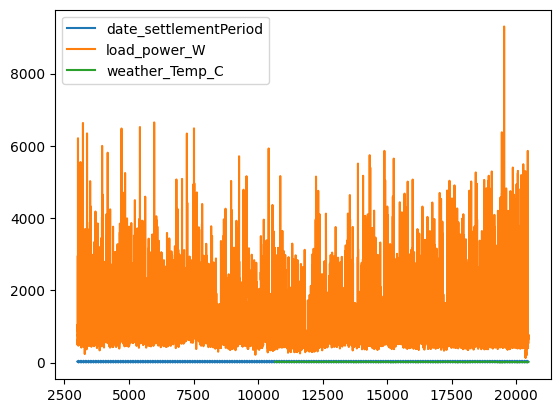

In [129]:
#Return indexes of time1 and time2

t1 = "2022-11-22T00:00:00.000Z"
t2 = "2023-05-23T00:00:00.000Z"

time1 = int(customer_data[customer_data['Date_UTC'] == t1].index.values[0])
time2 = int(customer_data[customer_data['Date_UTC'] == t2].index.values[0])

customer_data_slice = customer_data[time1:time2]

customerID = 793 # taken from the list of unique customer IDs

customer_data_793 = customer_data_slice

for ID in [699, 957, 858]:
    customer_data_793 = customer_data_793.drop(customer_data_793[customer_data_793['customerID'] == ID].index)
    
slt_customer_data_793 = customer_data_793.drop('customerID', axis=1)

slt_customer_data_793.plot()

# plt.show()

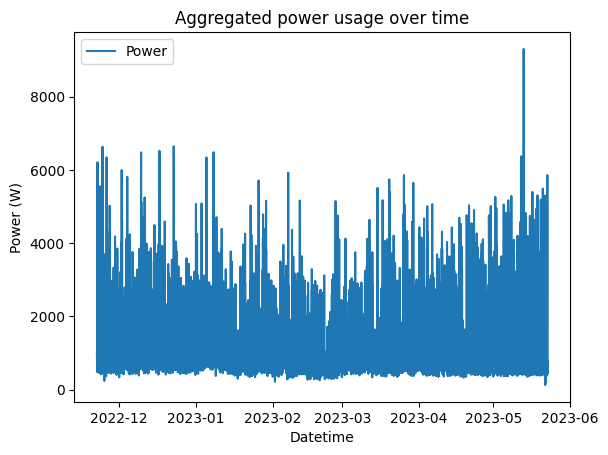

In [130]:
power = customer_data_793['load_power_W'].values
time = pd.to_datetime(customer_data_793['Date_UTC'], utc=True).to_numpy()

plt.plot(time,power,label='Power')
plt.xlabel('Datetime')
plt.ylabel('Power (W)')
plt.title('Aggregated power usage over time')
plt.legend()

Split dataset into three distinct usage periods:

1. Summer (May to September) - HP cooling
2. Winter (November to February) - HP heating
3. Other (October, March to April)

Create the 'average' day. We don't care about the year, so we reduce the UTC to month precision.

In [145]:
# summer_start = np.datetime64('2023-11-11T12:30:00')
# datetime_values = np.array([np.datetime64(string, 'M') for string in time])

start_summer = 5
end_summer = 9

# Filter the DataFrame by the range of months
slt_customer_data_793['Date_UTC'] = pd.to_datetime(slt_customer_data_793['Date_UTC'], utc=True)
summer_time_793 = slt_customer_data_793[slt_customer_data_793['Date_UTC'].dt.month.between(start_summer, end_summer)]

start_winter = 11
end_winter = 12

# Filter the DataFrame by the range of months
winter_time_793_1 = slt_customer_data_793[slt_customer_data_793['Date_UTC'].dt.month.between(start_winter, end_winter)]
winter_time_793_2 = slt_customer_data_793[slt_customer_data_793['Date_UTC'].dt.month.between(1, 2)]